# 1. Number of Strategy: 2

In [62]:
import numpy as np

def simulate_society(num_people, interest_rate, scaling_factor, iteration_time):
    # Initialize the society
    m = 100.0  # Starting money for each person
    wealth = np.full(num_people, m)  # Initial wealth for all people

    # Generate random investment ratio type for each person (0 for conservative, 1 for aggressive)
    investment_type = np.random.randint(0, 2, num_people)

    # Assign investment ratio based on type (conservative or aggressive)
    conservative_ratio = 0.3
    aggressive_ratio = 0.7
    investment_ratio = np.where(investment_type == 0, conservative_ratio, aggressive_ratio)

    # Lists to store wealth distribution after each round
    wealth_distribution = [wealth.copy()]

    # Run simulation for 'iteration_time' rounds
    for _ in range(iteration_time):
        # Calculate investment and consumption amount for each person
        investment_amount = investment_ratio * wealth

        total_consumption = np.sum((1 - investment_ratio) * wealth)
        consumption_amount = np.full(num_people, total_consumption / num_people)

        # Simulate investment and update wealth
        investment_returns = np.random.normal(interest_rate, scaling_factor * interest_rate, num_people)
        wealth += investment_amount * investment_returns

        # Calculate consumption and update wealth
        wealth -= investment_amount
        wealth += consumption_amount

        # Ensure wealth is non-negative
        wealth = np.maximum(wealth, 0)

        # Store the wealth distribution after each round
        wealth_distribution.append(wealth.copy())

    return wealth_distribution


In [106]:
num_people = 100
interest_rate = 0.05
scaling_factor = 0
iteration_time = 100

wealth_distribution = simulate_society(num_people, interest_rate, scaling_factor, iteration_time)

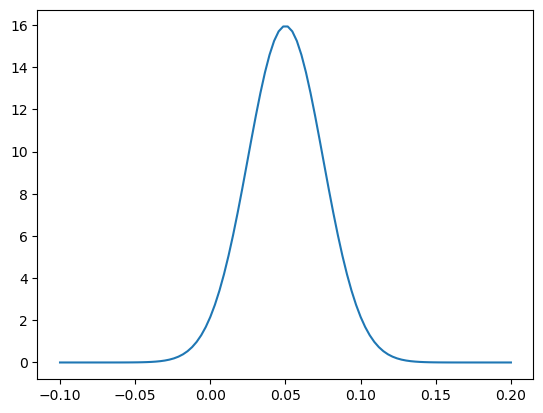

In [109]:
# plot the normal distribution for np.random.normal(interest_rate, scaling_factor * interest_rate, num_people)
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-0.1, 0.2, 100)
y = stats.norm.pdf(x, interest_rate,  0.5* interest_rate)
plt.plot(x, y)
plt.show()


In [83]:
import plotly

# plot the wealth distribution for each round

def plot_wealth_distribution(wealth_distribution):

    # Create figure
    fig = plotly.graph_objects.Figure()

    # Add traces, one for each slider step
    for wealth in wealth_distribution:
        fig.add_trace(
            plotly.graph_objects.Histogram(x=wealth, nbinsx=100, histnorm='probability density', visible=False))
        
    # Make 10th trace visible
    fig.data[10].visible = True

    # Create and add slider
    steps = []
    for i in range(len(fig.data)):

        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig.data)},
                {"title": "Wealth Distribution for Round " + str(i)}],  # layout attribute
        )
        step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active=10,
        currentvalue={"prefix": "Round: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders,
        width=800,
        height=600,
    )

    fig.show()

# Number of Strategy : 3

In [94]:
import numpy as np

def simulate_society(num_people, interest_rate, scaling_factor, iteration_time):
    # Initialize the society
    m = 100.0  # Starting money for each person
    wealth = np.full(num_people, m)  # Initial wealth for all people

    # Generate random investment strategy type for each person (0 for conservative, 1 for moderate, 2 for aggressive)
    investment_strategy = np.random.randint(0, 10, num_people)

    # Assign investment ratio based on strategy type
    strategies = {
        0: {"name": "s1", "ratio": 0},
        1: {"name": "s2", "ratio": 0.1},
        2: {"name": "s3", "ratio": 0.2},
        3: {"name": "s4", "ratio": 0.3},
        4: {"name": "s5", "ratio": 0.4},
        5: {"name": "s6", "ratio": 0.5},
        6: {"name": "s7", "ratio": 0.6},
        7: {"name": "s8", "ratio": 0.7},
        8: {"name": "s9", "ratio": 0.8},
        9: {"name": "s10", "ratio": 0.9},
        10: {"name": "s11", "ratio": 1}

    }

    investment_ratio = np.array([strategies[strategy]["ratio"] for strategy in investment_strategy])

    # Lists to store wealth distribution after each round
    wealth_distribution = [wealth.copy()]

    # Run simulation for 'iteration_time' rounds
    for _ in range(iteration_time):
        # Calculate investment and consumption amount for each person
        investment_amount = investment_ratio * wealth

        total_consumption = np.sum((1 - investment_ratio) * wealth)
        consumption_amount = np.full(num_people, total_consumption / num_people)

        # Simulate investment and update wealth
        investment_returns = np.random.normal(interest_rate, scaling_factor * interest_rate, num_people)
        wealth += investment_amount * investment_returns

        # Calculate consumption and update wealth
        wealth -= investment_amount
        wealth += consumption_amount

        # Ensure wealth is non-negative
        wealth = np.maximum(wealth, 0)

        # Store the wealth distribution after each round
        wealth_distribution.append(wealth.copy())

    return wealth_distribution


In [110]:
num_people = 100
interest_rate = 0.05
scaling_factor = 0
iteration_time = 100

wealth_distribution = simulate_society(num_people, interest_rate, scaling_factor, iteration_time)

In [111]:
# plot
plot_wealth_distribution(wealth_distribution)